In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
data=pd.read_csv("Dataset1.csv")
data.head(1)

,Weight (N),Stature (mm),Head circumference (mm),Shoulder breadth (mm),Hand length (mm),Chest circumference (mm),Waist circumference (mm),Age (months)
0,256,1278,505,298,138,602,553,120


In [3]:
Y=data['Hand length (mm)']
X=data.drop(['Hand length (mm)'],axis=1)

del data
X=np.array(X).astype(np.float32)
Y=np.array(Y).astype(np.float32)

x_train=X[:1000,:]
x_valid=X[1001:1050,:]
x_test=X[1051:1078,:]

Y_train=Y[:1000]
Y_valid=Y[1001:1050]
Y_test=Y[1051:1078]

In [4]:
#accuracy



In [5]:
#normalize fetaures
def normalize_data(features):
    mean=np.mean(features,axis=0)
    std=np.std(features,axis=0)
    return (features-mean)/std

In [6]:
x_train=normalize_data(x_train)
x_valid=normalize_data(x_valid)
x_test=normalize_data(x_test)

In [7]:
#reshape the feature and labels
def data_reshape(features,labels):
    n_samples=features.shape[0]
    n_dim=features.shape[1]
    f=np.reshape(np.c_[np.ones(n_samples),features],[n_samples,n_dim + 1])
    l=np.reshape(labels,[n_samples,1])
    return f,l
    

In [8]:
train_dataset,train_labels=data_reshape(x_train,Y_train)
valid_dataset,valid_labels=data_reshape(x_valid,Y_valid)
test_dataset,test_labels=data_reshape(x_test,Y_test)

In [10]:
#initialize Graph
dim=train_dataset.shape[1]
num_labels=1 #prediction

graph=tf.Graph()
with graph.as_default():
    # Placeholder and variable
    tf_train_dataset=tf.placeholder(tf.float32,shape=(None,dim))
    tf_train_labels=tf.placeholder(tf.float32,shape=(None,1))
    tf_valid_dataset=tf.constant(valid_dataset)
    tf_test_dataset=tf.constant(test_dataset)
    
    
    #weights and biases
    w1=tf.Variable(tf.truncated_normal(shape=[dim,num_labels],stddev=0.1))
    b1=tf.Variable(tf.ones([num_labels]))
    
    
    #model computation
    def model(dataset):
        regr=tf.add(tf.matmul(tf.cast(dataset,tf.float32),w1),b1)
        return regr
    
    #loss
    Y_=model(tf_train_dataset)
    loss=tf.reduce_mean(tf.square(Y_ - tf_train_labels))
    
    #optimize the loss
    optimize=tf.train.GradientDescentOptimizer(0.03).minimize(loss)
    
    #predict the value
    pred_train=Y_
    pred_valid=model(tf_valid_dataset)
    pred_test=model(tf_test_dataset)
    
    

In [16]:
#run till epoch=101
epochs=1001
cost_history = np.empty(shape=[1],dtype=float)


with tf.Session(graph=graph) as sess:
    tf.global_variables_initializer().run()
    print("Initialization done--------------------")
    feed_dict={tf_train_dataset:train_dataset,tf_train_labels:train_labels}
    for step in range(epochs):
        opt,l,pred=sess.run([optimize,loss,pred_train],feed_dict=feed_dict)
        cost_history=np.append(cost_history,l)
        if(step%100==0):
            print("loss at step %d:%f" %(step,l))
            

Initialization done--------------------
loss at step 0:29639.992188
loss at step 100:48.943714
loss at step 200:46.440941
loss at step 300:45.767712
loss at step 400:45.513687
loss at step 500:45.379906
loss at step 600:45.293758
loss at step 700:45.233288
loss at step 800:45.189453
loss at step 900:45.157330
loss at step 1000:45.133671


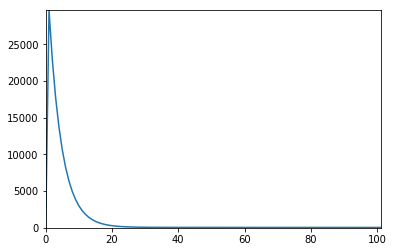

In [14]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,epochs,0,np.max(cost_history)])
plt.show()